# Plot Ekman velocity

Ekman velocity from surface stress (includes sea ice effects) and just from the wind stress (does not include sea ice effects)

### Import packages

In [1]:
import numpy as np
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib as mpl
import matplotlib.patches as mpatches
import pandas as pd
from sklearn import manifold
import seaborn as sns
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean.cm as cmo
import cmocean
from xhistogram.xarray import histogram
### os tools
import os.path
from glob import glob
import load_and_preprocess as lp
import file_io as io
import density
import random
import gsw

# save figure?
saveFig = True

In [2]:
# load fronts
pf = io.load_front("fronts/pf_kim.txt")
saccf = io.load_front("fronts/saccf_kim.txt")
saf = io.load_front("fronts/saf_kim.txt")
sbdy = io.load_front("fronts/sbdy_kim.txt")

In [3]:
# select geographic extent of the plot (keep consistent for all plots in this notebook)
lon_min = -65
lon_max =  80
lat_min = -80
lat_max = -45

# Ekman velocity from surface stress

In [4]:
ds = lp.load_ekman_vel()
we_mean = ds.we_oss.mean("time",skipna=True)
we_anomaly = ds.we_oss - we_mean

load_and_preprocess.load_ekman_vel


### Plot mean Ekman velocity from surface stress

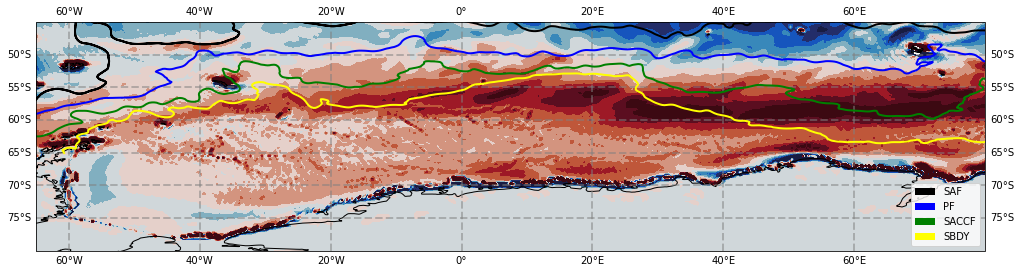

In [5]:
# make plot
plt.figure(figsize=(17, 13))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([lon_min, lon_max, lat_min, lat_max], ccrs.PlateCarree())

# contour plot of sea ice freezing
h = ax.contourf(we_mean.longitude, we_mean.latitude, we_mean,
                levels=[-100, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 100],
                transform=ccrs.PlateCarree(), vmin=-10, vmax=10,
                cmap=cmocean.cm.balance)

# fronts
h_saf = plt.plot(saf[:,0], saf[:,1], color="black", linewidth=2.0, transform=ccrs.Geodetic())
h_pf = plt.plot(pf[:,0], pf[:,1], color="blue", linewidth=2.0, transform=ccrs.Geodetic())
h_saccf = plt.plot(saccf[:,0], saccf[:,1], color="green", linewidth=2.0, transform=ccrs.Geodetic())
h_sbdy = plt.plot(sbdy[:,0], sbdy[:,1], color="yellow", linewidth=2.0, transform=ccrs.Geodetic())
ax.coastlines(resolution='50m')
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
             linewidth=2, color='gray', alpha=0.5, linestyle='--')
ax.add_feature(cartopy.feature.LAND)

# make two proxy artists to add to a legend
l_saf = mpatches.Rectangle((0, 0), 1, 1, facecolor="black")
l_pf = mpatches.Rectangle((0, 0), 1, 1, facecolor="blue")
l_saccf = mpatches.Rectangle((0, 0), 1, 1, facecolor="green")
l_sbdy = mpatches.Rectangle((0, 0), 1, 1, facecolor="yellow")
labels = ['SAF', 'PF', 'SACCF', 'SBDY']
plt.legend([l_saf, l_pf, l_saccf, l_sbdy], labels,
           loc='lower right', fancybox=True)

# save figure
if saveFig==True:
    plt.savefig("plots/physical_fields/ekman_velocity_mean_oss.png", bbox_inches="tight")
    plt.savefig("plots/physical_fields/ekman_velocity_mean_oss.pdf", bbox_inches="tight")
    plt.show()
    plt.close()

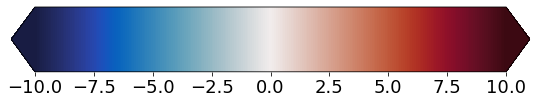

In [6]:
# separate colorbar
a = np.array([[-10, 10]])    # 1e-4
plt.figure(figsize=(9, 1.5))
img = plt.imshow(a, cmap=cmocean.cm.balance)
plt.gca().set_visible(False)
cax = plt.axes([0.1, 0.2, 0.8, 0.6])
cbar = plt.colorbar(orientation="horizontal", cax=cax, extend="both")
cbar.ax.tick_params(labelsize=18)

if saveFig==True:
    plt.savefig('plots/physical_fields/wek_colorbar_oss.pdf', bbox_inches='tight')
    plt.savefig('plots/physical_fields/wek_colorbar_oss.png', bbox_inches='tight')
    plt.show()
    plt.close()

# Seaonal mean (JJA)

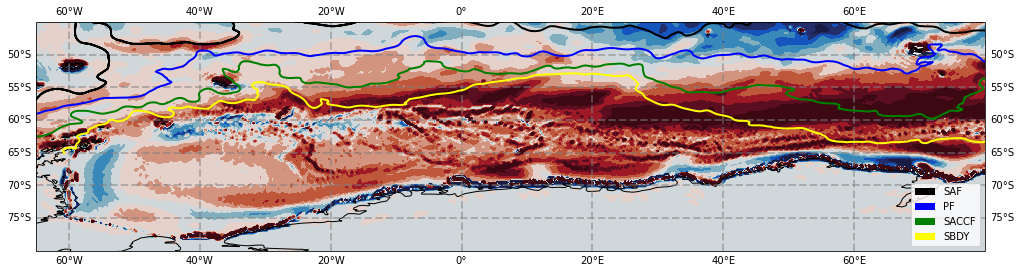

In [7]:
# seasonal mean
#we = we_anomaly[5:8,:,:].mean("time",skipna=True)   # seasonal mean
we = ds.we_oss[[5,6,7],:,:].mean("time",skipna=True)

# make plot
plt.figure(figsize=(17, 13))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([lon_min, lon_max, lat_min, lat_max], ccrs.PlateCarree())

# contour plot of sea ice freezing
h = ax.contourf(we.longitude, we.latitude, we,
                levels=[-100, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 100],
                transform=ccrs.PlateCarree(), vmin=-10, vmax=10,
                cmap=cmocean.cm.balance)

# fronts
h_saf = plt.plot(saf[:,0], saf[:,1], color="black", linewidth=2.0, transform=ccrs.Geodetic())
h_pf = plt.plot(pf[:,0], pf[:,1], color="blue", linewidth=2.0, transform=ccrs.Geodetic())
h_saccf = plt.plot(saccf[:,0], saccf[:,1], color="green", linewidth=2.0, transform=ccrs.Geodetic())
h_sbdy = plt.plot(sbdy[:,0], sbdy[:,1], color="yellow", linewidth=2.0, transform=ccrs.Geodetic())
ax.coastlines(resolution='50m')
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
             linewidth=2, color='gray', alpha=0.5, linestyle='--')
ax.add_feature(cartopy.feature.LAND)

# make two proxy artists to add to a legend
l_saf = mpatches.Rectangle((0, 0), 1, 1, facecolor="black")
l_pf = mpatches.Rectangle((0, 0), 1, 1, facecolor="blue")
l_saccf = mpatches.Rectangle((0, 0), 1, 1, facecolor="green")
l_sbdy = mpatches.Rectangle((0, 0), 1, 1, facecolor="yellow")
labels = ['SAF', 'PF', 'SACCF', 'SBDY']
plt.legend([l_saf, l_pf, l_saccf, l_sbdy], labels,
           loc='lower right', fancybox=True)

# save figure
if saveFig==True:
    plt.savefig("plots/physical_fields/ekman_velocity_JJA_oss.png", bbox_inches="tight")
    plt.savefig("plots/physical_fields/ekman_velocity_JJA_oss.pdf", bbox_inches="tight")
    plt.show()
    plt.close()

# Seasona mean (SON)

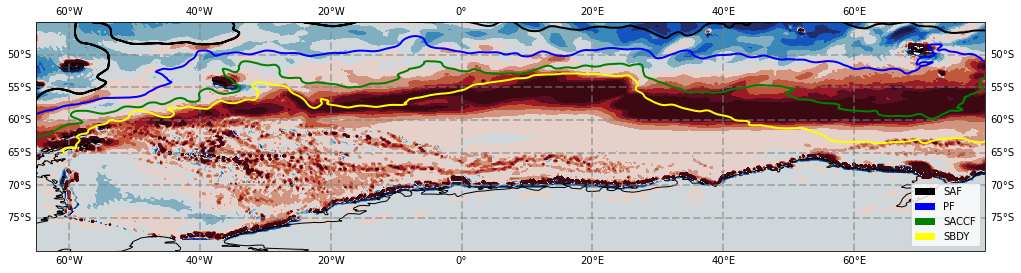

In [8]:
# seasonal mean
#we = we_anomaly[5:8,:,:].mean("time",skipna=True)   # seasonal mean
we = ds.we_oss[[8,9,10],:,:].mean("time",skipna=True)

# make plot
plt.figure(figsize=(17, 13))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([lon_min, lon_max, lat_min, lat_max], ccrs.PlateCarree())

# contour plot of sea ice freezing
h = ax.contourf(we.longitude, we.latitude, we,
                levels=[-100, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 100],
                transform=ccrs.PlateCarree(), vmin=-10, vmax=10,
                cmap=cmocean.cm.balance)

# fronts
h_saf = plt.plot(saf[:,0], saf[:,1], color="black", linewidth=2.0, transform=ccrs.Geodetic())
h_pf = plt.plot(pf[:,0], pf[:,1], color="blue", linewidth=2.0, transform=ccrs.Geodetic())
h_saccf = plt.plot(saccf[:,0], saccf[:,1], color="green", linewidth=2.0, transform=ccrs.Geodetic())
h_sbdy = plt.plot(sbdy[:,0], sbdy[:,1], color="yellow", linewidth=2.0, transform=ccrs.Geodetic())
ax.coastlines(resolution='50m')
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
             linewidth=2, color='gray', alpha=0.5, linestyle='--')
ax.add_feature(cartopy.feature.LAND)

# make two proxy artists to add to a legend
l_saf = mpatches.Rectangle((0, 0), 1, 1, facecolor="black")
l_pf = mpatches.Rectangle((0, 0), 1, 1, facecolor="blue")
l_saccf = mpatches.Rectangle((0, 0), 1, 1, facecolor="green")
l_sbdy = mpatches.Rectangle((0, 0), 1, 1, facecolor="yellow")
labels = ['SAF', 'PF', 'SACCF', 'SBDY']
plt.legend([l_saf, l_pf, l_saccf, l_sbdy], labels,
           loc='lower right', fancybox=True)

# save figure
if saveFig==True:
    plt.savefig("plots/physical_fields/ekman_velocity_SON_oss.png", bbox_inches="tight")
    plt.savefig("plots/physical_fields/ekman_velocity_SON_oss.pdf", bbox_inches="tight")
    plt.show()
    plt.close()

# Seasonal mean (DJF)

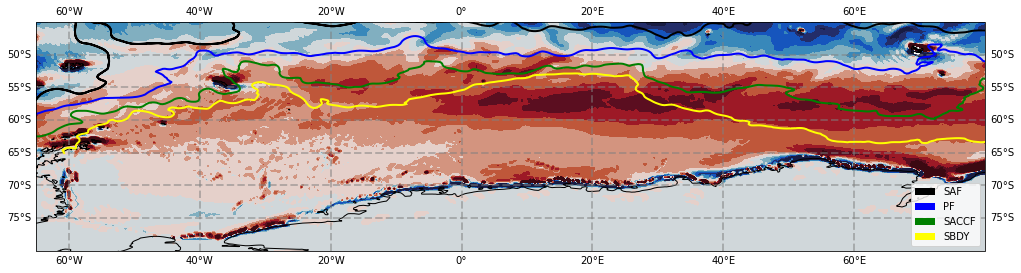

In [9]:
# seasonal mean
#we = we_anomaly[5:8,:,:].mean("time",skipna=True)   # seasonal mean
we = ds.we_oss[[0,1,11],:,:].mean("time",skipna=True)

# make plot
plt.figure(figsize=(17, 13))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([lon_min, lon_max, lat_min, lat_max], ccrs.PlateCarree())

# contour plot of sea ice freezing
h = ax.contourf(we.longitude, we.latitude, we,
                levels=[-100, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 100],
                transform=ccrs.PlateCarree(), vmin=-10, vmax=10,
                cmap=cmocean.cm.balance)

# fronts
h_saf = plt.plot(saf[:,0], saf[:,1], color="black", linewidth=2.0, transform=ccrs.Geodetic())
h_pf = plt.plot(pf[:,0], pf[:,1], color="blue", linewidth=2.0, transform=ccrs.Geodetic())
h_saccf = plt.plot(saccf[:,0], saccf[:,1], color="green", linewidth=2.0, transform=ccrs.Geodetic())
h_sbdy = plt.plot(sbdy[:,0], sbdy[:,1], color="yellow", linewidth=2.0, transform=ccrs.Geodetic())
ax.coastlines(resolution='50m')
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
             linewidth=2, color='gray', alpha=0.5, linestyle='--')
ax.add_feature(cartopy.feature.LAND)

# make two proxy artists to add to a legend
l_saf = mpatches.Rectangle((0, 0), 1, 1, facecolor="black")
l_pf = mpatches.Rectangle((0, 0), 1, 1, facecolor="blue")
l_saccf = mpatches.Rectangle((0, 0), 1, 1, facecolor="green")
l_sbdy = mpatches.Rectangle((0, 0), 1, 1, facecolor="yellow")
labels = ['SAF', 'PF', 'SACCF', 'SBDY']
plt.legend([l_saf, l_pf, l_saccf, l_sbdy], labels,
           loc='lower right', fancybox=True)

# save figure
if saveFig==True:
    plt.savefig("plots/physical_fields/ekman_velocity_DJF_oss.png", bbox_inches="tight")
    plt.savefig("plots/physical_fields/ekman_velocity_DJF_oss.pdf", bbox_inches="tight")
    plt.show()
    plt.close()

# Seasaonal mean (MAM)

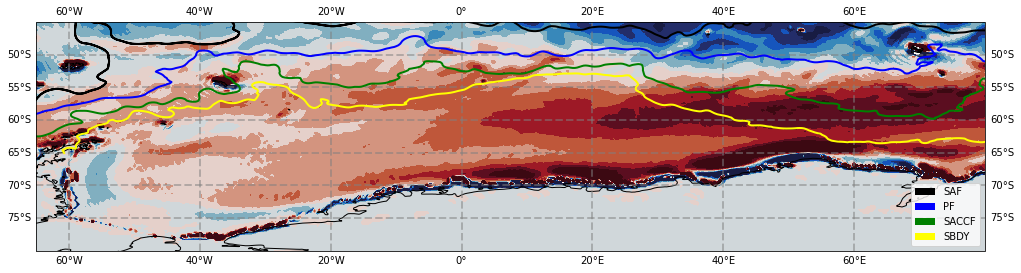

In [10]:
# seasonal mean
we = ds.we_oss[[2,3,4],:,:].mean("time",skipna=True)

# make plot
plt.figure(figsize=(17, 13))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([lon_min, lon_max, lat_min, lat_max], ccrs.PlateCarree())

# contour plot of sea ice freezing
h = ax.contourf(we.longitude, we.latitude, we,
                levels=[-100, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 100],
                transform=ccrs.PlateCarree(), vmin=-10, vmax=10,
                cmap=cmocean.cm.balance)

# fronts
h_saf = plt.plot(saf[:,0], saf[:,1], color="black", linewidth=2.0, transform=ccrs.Geodetic())
h_pf = plt.plot(pf[:,0], pf[:,1], color="blue", linewidth=2.0, transform=ccrs.Geodetic())
h_saccf = plt.plot(saccf[:,0], saccf[:,1], color="green", linewidth=2.0, transform=ccrs.Geodetic())
h_sbdy = plt.plot(sbdy[:,0], sbdy[:,1], color="yellow", linewidth=2.0, transform=ccrs.Geodetic())
ax.coastlines(resolution='50m')
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
             linewidth=2, color='gray', alpha=0.5, linestyle='--')
ax.add_feature(cartopy.feature.LAND)

# make two proxy artists to add to a legend
l_saf = mpatches.Rectangle((0, 0), 1, 1, facecolor="black")
l_pf = mpatches.Rectangle((0, 0), 1, 1, facecolor="blue")
l_saccf = mpatches.Rectangle((0, 0), 1, 1, facecolor="green")
l_sbdy = mpatches.Rectangle((0, 0), 1, 1, facecolor="yellow")
labels = ['SAF', 'PF', 'SACCF', 'SBDY']
plt.legend([l_saf, l_pf, l_saccf, l_sbdy], labels,
           loc='lower right', fancybox=True)

# save figure
if saveFig==True:
    plt.savefig("plots/physical_fields/ekman_velocity_MAM_oss.png", bbox_inches="tight")
    plt.savefig("plots/physical_fields/ekman_velocity_MAM_oss.pdf", bbox_inches="tight")
    plt.show()
    plt.close()

# Ekman velocity from tau

In [11]:
ds = lp.load_ekman_vel()
we_mean = ds.we_tau.mean("time",skipna=True)
we_anomaly = ds.we_tau - we_mean

load_and_preprocess.load_ekman_vel


### Plot mean Ekman velocity from surface stress

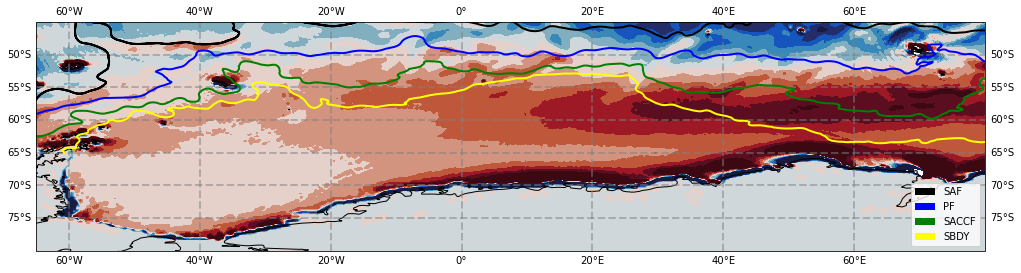

In [12]:
# make plot
plt.figure(figsize=(17, 13))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([lon_min, lon_max, lat_min, lat_max], ccrs.PlateCarree())

# contour plot of sea ice freezing
h = ax.contourf(we.longitude, we.latitude, we_mean,
                levels=[-100, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 100],
                transform=ccrs.PlateCarree(), vmin=-10, vmax=10,
                cmap=cmocean.cm.balance)

# fronts
h_saf = plt.plot(saf[:,0], saf[:,1], color="black", linewidth=2.0, transform=ccrs.Geodetic())
h_pf = plt.plot(pf[:,0], pf[:,1], color="blue", linewidth=2.0, transform=ccrs.Geodetic())
h_saccf = plt.plot(saccf[:,0], saccf[:,1], color="green", linewidth=2.0, transform=ccrs.Geodetic())
h_sbdy = plt.plot(sbdy[:,0], sbdy[:,1], color="yellow", linewidth=2.0, transform=ccrs.Geodetic())
ax.coastlines(resolution='50m')
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
             linewidth=2, color='gray', alpha=0.5, linestyle='--')
ax.add_feature(cartopy.feature.LAND)

# make two proxy artists to add to a legend
l_saf = mpatches.Rectangle((0, 0), 1, 1, facecolor="black")
l_pf = mpatches.Rectangle((0, 0), 1, 1, facecolor="blue")
l_saccf = mpatches.Rectangle((0, 0), 1, 1, facecolor="green")
l_sbdy = mpatches.Rectangle((0, 0), 1, 1, facecolor="yellow")
labels = ['SAF', 'PF', 'SACCF', 'SBDY']
plt.legend([l_saf, l_pf, l_saccf, l_sbdy], labels,
           loc='lower right', fancybox=True)

# save figure
if saveFig==True:
    plt.savefig("plots/physical_fields/ekman_velocity_mean_tau.png", bbox_inches="tight")
    plt.savefig("plots/physical_fields/ekman_velocity_mean_tau.pdf", bbox_inches="tight")
    plt.show()
    plt.close()

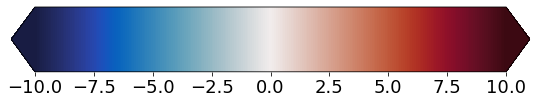

In [13]:
# separate colorbar
a = np.array([[-10, 10]])    # 1e-4
plt.figure(figsize=(9, 1.5))
img = plt.imshow(a, cmap=cmocean.cm.balance)
plt.gca().set_visible(False)
cax = plt.axes([0.1, 0.2, 0.8, 0.6])
cbar = plt.colorbar(orientation="horizontal", cax=cax, extend="both")
cbar.ax.tick_params(labelsize=18)

if saveFig==True:
    plt.savefig('plots/physical_fields/wek_colorbar_tau.pdf', bbox_inches='tight')
    plt.savefig('plots/physical_fields/wek_colorbar_tau.png', bbox_inches='tight')
    plt.show()
    plt.close()

# Seaonal mean (JJA)

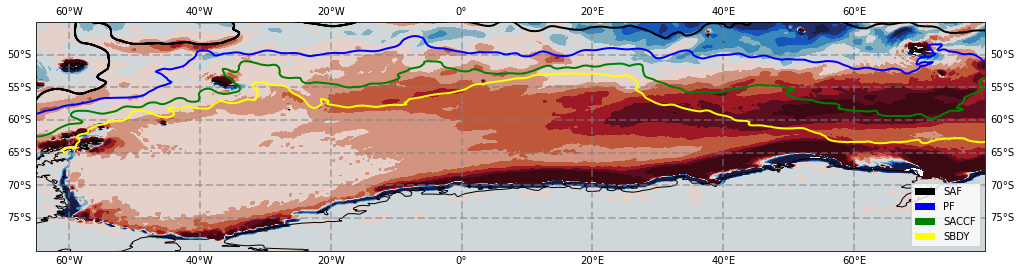

In [14]:
# seasonal mean
#we = we_anomaly[5:8,:,:].mean("time",skipna=True)   # seasonal mean
we = ds.we_tau[[5,6,7],:,:].mean("time",skipna=True)

# make plot
plt.figure(figsize=(17, 13))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([lon_min, lon_max, lat_min, lat_max], ccrs.PlateCarree())

# contour plot of sea ice freezing
h = ax.contourf(we.longitude, we.latitude, we,
                levels=[-100, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 100],
                transform=ccrs.PlateCarree(), vmin=-10, vmax=10,
                cmap=cmocean.cm.balance)

# fronts
h_saf = plt.plot(saf[:,0], saf[:,1], color="black", linewidth=2.0, transform=ccrs.Geodetic())
h_pf = plt.plot(pf[:,0], pf[:,1], color="blue", linewidth=2.0, transform=ccrs.Geodetic())
h_saccf = plt.plot(saccf[:,0], saccf[:,1], color="green", linewidth=2.0, transform=ccrs.Geodetic())
h_sbdy = plt.plot(sbdy[:,0], sbdy[:,1], color="yellow", linewidth=2.0, transform=ccrs.Geodetic())
ax.coastlines(resolution='50m')
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
             linewidth=2, color='gray', alpha=0.5, linestyle='--')
ax.add_feature(cartopy.feature.LAND)

# make two proxy artists to add to a legend
l_saf = mpatches.Rectangle((0, 0), 1, 1, facecolor="black")
l_pf = mpatches.Rectangle((0, 0), 1, 1, facecolor="blue")
l_saccf = mpatches.Rectangle((0, 0), 1, 1, facecolor="green")
l_sbdy = mpatches.Rectangle((0, 0), 1, 1, facecolor="yellow")
labels = ['SAF', 'PF', 'SACCF', 'SBDY']
plt.legend([l_saf, l_pf, l_saccf, l_sbdy], labels,
           loc='lower right', fancybox=True)

# save figure
if saveFig==True:
    plt.savefig("plots/physical_fields/ekman_velocity_JJA_tau.png", bbox_inches="tight")
    plt.savefig("plots/physical_fields/ekman_velocity_JJA_tau.pdf", bbox_inches="tight")
    plt.show()
    plt.close()

# Seasonal mean (SON)

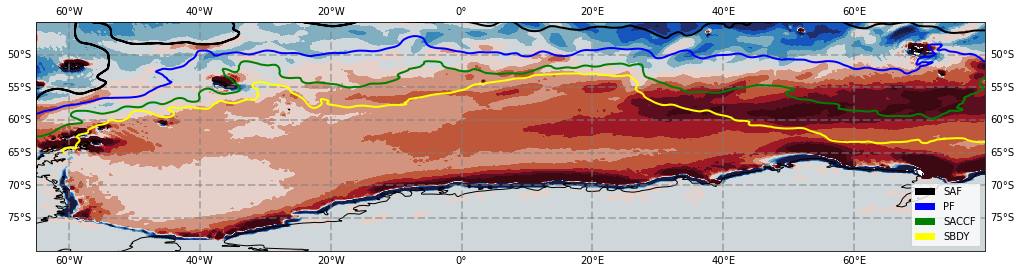

In [15]:
# seasonal mean
#we = we_anomaly[5:8,:,:].mean("time",skipna=True)   # seasonal mean
we = ds.we_tau[[8,9,10],:,:].mean("time",skipna=True)

# make plot
plt.figure(figsize=(17, 13))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([lon_min, lon_max, lat_min, lat_max], ccrs.PlateCarree())

# contour plot of sea ice freezing
h = ax.contourf(we.longitude, we.latitude, we,
                levels=[-100, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 100],
                transform=ccrs.PlateCarree(), vmin=-10, vmax=10,
                cmap=cmocean.cm.balance)

# fronts
h_saf = plt.plot(saf[:,0], saf[:,1], color="black", linewidth=2.0, transform=ccrs.Geodetic())
h_pf = plt.plot(pf[:,0], pf[:,1], color="blue", linewidth=2.0, transform=ccrs.Geodetic())
h_saccf = plt.plot(saccf[:,0], saccf[:,1], color="green", linewidth=2.0, transform=ccrs.Geodetic())
h_sbdy = plt.plot(sbdy[:,0], sbdy[:,1], color="yellow", linewidth=2.0, transform=ccrs.Geodetic())
ax.coastlines(resolution='50m')
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
             linewidth=2, color='gray', alpha=0.5, linestyle='--')
ax.add_feature(cartopy.feature.LAND)

# make two proxy artists to add to a legend
l_saf = mpatches.Rectangle((0, 0), 1, 1, facecolor="black")
l_pf = mpatches.Rectangle((0, 0), 1, 1, facecolor="blue")
l_saccf = mpatches.Rectangle((0, 0), 1, 1, facecolor="green")
l_sbdy = mpatches.Rectangle((0, 0), 1, 1, facecolor="yellow")
labels = ['SAF', 'PF', 'SACCF', 'SBDY']
plt.legend([l_saf, l_pf, l_saccf, l_sbdy], labels,
           loc='lower right', fancybox=True)

# save figure
if saveFig==True:
    plt.savefig("plots/physical_fields/ekman_velocity_SON_tau.png", bbox_inches="tight")
    plt.savefig("plots/physical_fields/ekman_velocity_SON_tau.pdf", bbox_inches="tight")
    plt.show()
    plt.close()

# Seasonal mean (DJF)

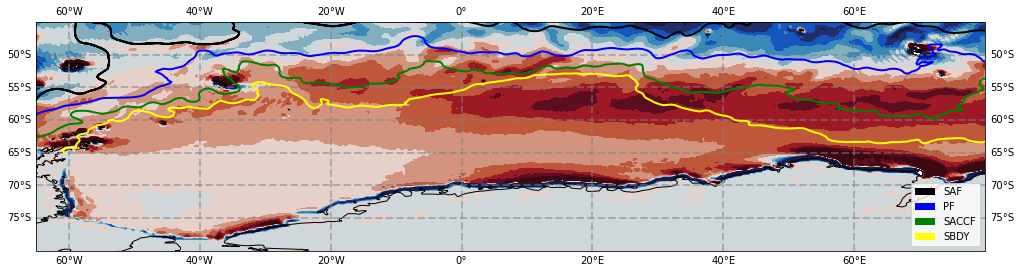

In [16]:
# seasonal mean
#we = we_anomaly[5:8,:,:].mean("time",skipna=True)   # seasonal mean
we = ds.we_tau[[0,1,11],:,:].mean("time",skipna=True)

# make plot
plt.figure(figsize=(17, 13))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([lon_min, lon_max, lat_min, lat_max], ccrs.PlateCarree())

# contour plot of sea ice freezing
h = ax.contourf(we.longitude, we.latitude, we,
                levels=[-100, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 100],
                transform=ccrs.PlateCarree(), vmin=-10, vmax=10,
                cmap=cmocean.cm.balance)

# fronts
h_saf = plt.plot(saf[:,0], saf[:,1], color="black", linewidth=2.0, transform=ccrs.Geodetic())
h_pf = plt.plot(pf[:,0], pf[:,1], color="blue", linewidth=2.0, transform=ccrs.Geodetic())
h_saccf = plt.plot(saccf[:,0], saccf[:,1], color="green", linewidth=2.0, transform=ccrs.Geodetic())
h_sbdy = plt.plot(sbdy[:,0], sbdy[:,1], color="yellow", linewidth=2.0, transform=ccrs.Geodetic())
ax.coastlines(resolution='50m')
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
             linewidth=2, color='gray', alpha=0.5, linestyle='--')
ax.add_feature(cartopy.feature.LAND)

# make two proxy artists to add to a legend
l_saf = mpatches.Rectangle((0, 0), 1, 1, facecolor="black")
l_pf = mpatches.Rectangle((0, 0), 1, 1, facecolor="blue")
l_saccf = mpatches.Rectangle((0, 0), 1, 1, facecolor="green")
l_sbdy = mpatches.Rectangle((0, 0), 1, 1, facecolor="yellow")
labels = ['SAF', 'PF', 'SACCF', 'SBDY']
plt.legend([l_saf, l_pf, l_saccf, l_sbdy], labels,
           loc='lower right', fancybox=True)

# save figure
if saveFig==True:
    plt.savefig("plots/physical_fields/ekman_velocity_DJF_tau.png", bbox_inches="tight")
    plt.savefig("plots/physical_fields/ekman_velocity_DJF_tau.pdf", bbox_inches="tight")
    plt.show()
    plt.close()

# Seasaonal mean (MAM)

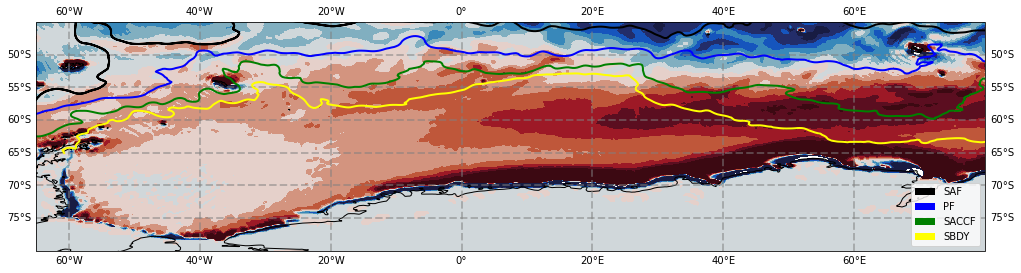

In [17]:
# seasonal mean
we = ds.we_tau[[2,3,4],:,:].mean("time",skipna=True)

# make plot
plt.figure(figsize=(17, 13))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([lon_min, lon_max, lat_min, lat_max], ccrs.PlateCarree())

# contour plot of sea ice freezing
h = ax.contourf(we.longitude, we.latitude, we,
                levels=[-100, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 100],
                transform=ccrs.PlateCarree(), vmin=-10, vmax=10,
                cmap=cmocean.cm.balance)

# fronts
h_saf = plt.plot(saf[:,0], saf[:,1], color="black", linewidth=2.0, transform=ccrs.Geodetic())
h_pf = plt.plot(pf[:,0], pf[:,1], color="blue", linewidth=2.0, transform=ccrs.Geodetic())
h_saccf = plt.plot(saccf[:,0], saccf[:,1], color="green", linewidth=2.0, transform=ccrs.Geodetic())
h_sbdy = plt.plot(sbdy[:,0], sbdy[:,1], color="yellow", linewidth=2.0, transform=ccrs.Geodetic())
ax.coastlines(resolution='50m')
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
             linewidth=2, color='gray', alpha=0.5, linestyle='--')
ax.add_feature(cartopy.feature.LAND)

# make two proxy artists to add to a legend
l_saf = mpatches.Rectangle((0, 0), 1, 1, facecolor="black")
l_pf = mpatches.Rectangle((0, 0), 1, 1, facecolor="blue")
l_saccf = mpatches.Rectangle((0, 0), 1, 1, facecolor="green")
l_sbdy = mpatches.Rectangle((0, 0), 1, 1, facecolor="yellow")
labels = ['SAF', 'PF', 'SACCF', 'SBDY']
plt.legend([l_saf, l_pf, l_saccf, l_sbdy], labels,
           loc='lower right', fancybox=True)

# save figure
if saveFig==True:
    plt.savefig("plots/physical_fields/ekman_velocity_MAM_tau.png", bbox_inches="tight")
    plt.savefig("plots/physical_fields/ekman_velocity_MAM_tau.pdf", bbox_inches="tight")
    plt.show()
    plt.close()